In [2]:
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .appName("Tutorial4_Example")\
        .getOrCreate()

22/12/10 10:35:02 WARN Utils: Your hostname, bigdata-vmware resolves to a loopback address: 127.0.1.1; using 192.168.10.135 instead (on interface ens33)
22/12/10 10:35:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/10 10:35:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


The Census Income dataset has 48,842 samples. 

Each sample contains the following information about an individual:
- age: the age of an individual.
    - Integer greater than 0.
- workclass: a general term representing the employment status of an individual.
    - Private, Selfempnotinc, Selfempinc, Federalgov, Localgov, Stategov, Withoutpay, Neverworked.
- fnlwgt : final weight. This is the number of people the census believes the entry represents.
    - Integer greater than 0.
- education : the highest level of education achieved by an individual.
    - Bachelors, Somecollege, 11th, HSgrad, Profschool, Assocacdm, Assocvoc, 9th, 7th8th, 12th, Masters, 1st4th, 10th, Doctorate, 5th6th, Preschool.
- education-num: the highest level of education achieved in numerical form.
    - Integer greater than 0.
- marital-status: marital status of an individual.
    - Marriedcivspouse, Divorced, Nevermarried, Separated, Widowed, Marriedspouseabsent, MarriedAFspouse.
- occupation: the general type of occupation of an individual.
    - Techsupport, Craftrepair, Otherservice, Sales, Execmanagerial, Profspecialty, Handlerscleaners, Machineopinspct, Admclerical, Farmingfishing, Transportmoving, Privhouseserv, Protectiveserv, ArmedForces.
- relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status.
    - Wife, Ownchild, Husband, Notinfamily, Otherrelative, Unmarried.
- race : individual’s race.
    - AsianPacIslander, AmerIndianEskimo, Black, White, Other.
- sex: the biological sex of the individual.
    - Male, Female.
- capital-gain: capital gains for an individual.
    - Integer greater than or equal to 0.
- capital-loss: capital loss for an individual.
    - Integer greater than or equal to 0.
- hours-per-week: the hours an individual has reported to work per week.
    - continuous.
- native-country: country of origin for an individual.
    - UnitedStates, Cambodia, England, PuertoRico, Canada, Germany, OutlyingUS(GuamUSVIetc), India, Japan,  Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, DominicanRepublic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.
- income: whether or not an individual makes more than $50,000 annually. Label attribute.
    - <=50k, >50k.

The dataset contains missing values that are marked with a question mark character (?)

In [4]:
df = spark.read.csv("data/adult.csv", header=True, inferSchema=True)

#df.printSchema()
df.show(5, truncate=False)


+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|x  |age|workclass|fnlwgt|education   |educational-num|marital-status    |occupation       |relationship|race |gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|1  |25 |Private  |226802|11th        |7              |Never-married     |Machine-op-inspct|Own-child   |Black|Male  |0           |0           |40            |United-States |<=50K |
|2  |38 |Private  |89814 |HS-grad     |9              |Married-civ-spouse|Farming-fishing  |Husband     |White|Male  |0           |0           |50            |United-States |<=50K |
|3  |28 |Local-gov|336951|Assoc-acdm  |12             |Married-civ-spouse|Protective-serv 

In [3]:
df.describe().show()

+-------+------------------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|summary|                 x|               age|  workclass|            fnlwgt|   education|   educational-num|marital-status|      occupation|relationship|              race|gender|      capital-gain|     capital-loss|    hours-per-week|native-country|income|
+-------+------------------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|  count|             48842|             48842|      48842|             48842|       48842|             48842|         48842|           48842|       48842|             48842| 48842|             48842|            48842|  

In [5]:
df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|             48842|
|   mean| 38.64358543876172|
| stddev|13.710509934443525|
|    min|                17|
|    max|                90|
+-------+------------------+



In [11]:
# Computing the percentage of "<=50K" and ">50K"

total = df.count()
df_aux = df.groupBy("income").count()
#df_aux.show()

# In the code below we use the bracket notation to assess the count column because count is also a function.
# Using  df_aux.count would cause an error in this case. The bracket notation always works!
df2 = df_aux.withColumn("percentage", df_aux["count"] * 100 / total)
df2.show()

#Alternative
#rdd = df_aux.rdd.map(lambda x: (x["income"], x["count"] / total * 100))
#rdd.foreach(print)

+------+-----+
|income|count|
+------+-----+
| <=50K|37155|
|  >50K|11687|
+------+-----+

+------+-----+------------------+
|income|count|        percentage|
+------+-----+------------------+
| <=50K|37155| 76.07182343065395|
|  >50K|11687|23.928176569346054|
+------+-----+------------------+



In [12]:

#print(df.count())
#workclass_distinct_values = df.select('workclass').distinct().collect()
#workclass_distinct_values
#df2 = df.filter(df.workclass != '?')
#print(df2.count())

# We would need to do this for all features with '?' values

# Alternatively, we can edit the dataset file replacing all ',?,' by ',,' and then:

df = spark.read.csv("data/adult_NULL.csv", header=True, inferSchema=True)

print(df.count())
df = df.dropna()
print(df.count())

48842
45222


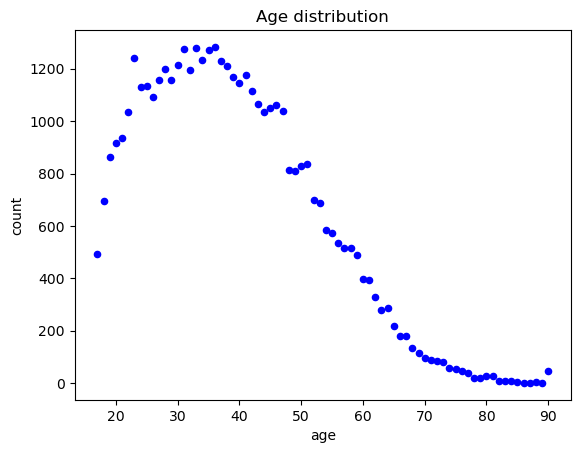

In [4]:
# Plotting age distribution. We need to install pandas: pip install pandas

df_age = df.groupBy("age").count().sort("age", ascending=True)
#df_age.show()

import pandas as pd
import matplotlib.pyplot as plt

pdf = df_age.toPandas()

pdf.plot(kind = 'scatter', x = 'age', y = 'count', color = 'blue')
  
# set the title
plt.title('Age distribution')
  
# show the plot
plt.show()


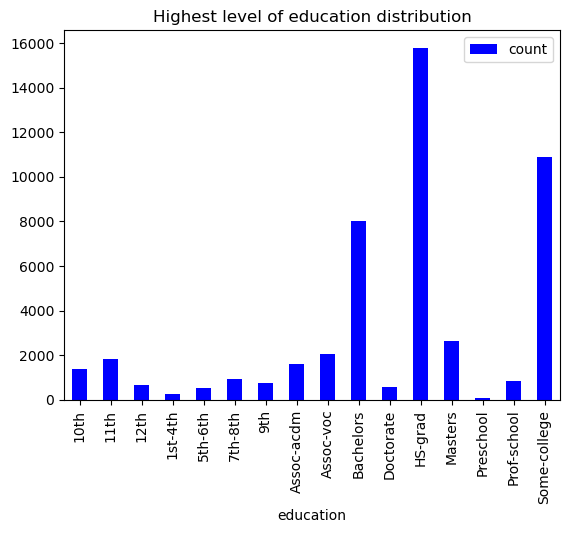

In [56]:
# Plotting highest level of education distribution.

df_education = df.groupBy("education").count().sort("education", ascending=True)
#df_education.show()

import pandas as pd
import matplotlib.pyplot as plt

pdf = df_education.toPandas()

pdf.plot(kind = 'bar', x = 'education', y = 'count', color = 'blue')
  
# set the title
plt.title('Highest level of education distribution')
  
# show the plot
plt.show()

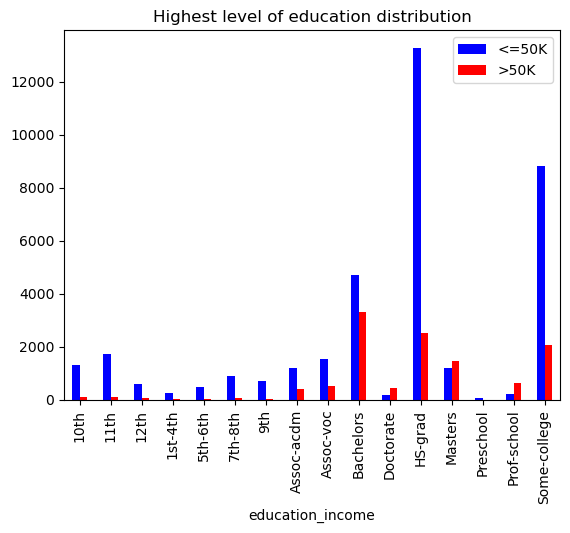

In [58]:
edu_inc = df.crosstab('education', 'income').sort('education_income')

import pandas as pd
import matplotlib.pyplot as plt

pdf = edu_inc.toPandas()

pdf.plot(kind = 'bar', x = 'education_income', y = ['<=50K', '>50K'], color = ['blue', 'red'])
  
# set the title
plt.title('Highest level of education distribution')
  
# show the plot
plt.show()

In [33]:
df.groupby('marital-status').agg({'capital-gain': 'mean', 'capital-loss': 'mean'}).show()

+--------------------+------------------+------------------+
|      marital-status| avg(capital-loss)| avg(capital-gain)|
+--------------------+------------------+------------------+
|           Separated|56.618954248366016| 581.8424836601307|
|       Never-married| 54.12607805422846|  384.382639449029|
|Married-spouse-ab...| 63.18471337579618| 629.0047770700637|
|            Divorced| 67.65430423639378| 793.6755615860094|
|             Widowed|  81.6205533596838| 603.6442687747035|
|   Married-AF-spouse| 84.75675675675676|2971.6216216216217|
|  Married-civ-spouse|120.61950936145493|1739.7006121810625|
+--------------------+------------------+------------------+



In [17]:
df = df.drop('x', 'educational-num')
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [18]:
from pyspark.sql.functions import *

df = df.withColumn('age-square', col('age') ** 2)

df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)
 |-- age-square: double (nullable = true)



In [19]:
#Just to reorganize the columns. It could be used to select jsut the ones that we want to consider.

COLUMNS = ['age', 'age-square', 'workclass', 'fnlwgt', 'education', 'marital-status',
           'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = df.select(COLUMNS)
df.first()

Row(age=25, age-square=625.0, workclass='Private', fnlwgt=226802, education='11th', marital-status='Never-married', occupation='Machine-op-inspct', relationship='Own-child', race='Black', gender='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', income='<=50K')

In [20]:
df.groupBy("native-country").count().sort("count", ascending=True).show()

#Alternative
#df.groupby('native-country').agg({'native-country': 'count'}).sort(asc("count(native-country)")).show()

+--------------------+-----+
|      native-country|count|
+--------------------+-----+
|  Holand-Netherlands|    1|
|             Hungary|   18|
|            Honduras|   19|
|            Scotland|   20|
|                Laos|   21|
|Outlying-US(Guam-...|   22|
|          Yugoslavia|   23|
|     Trinadad&Tobago|   26|
|            Cambodia|   26|
|                Hong|   28|
|            Thailand|   29|
|              France|   36|
|             Ireland|   36|
|             Ecuador|   43|
|                Peru|   45|
|           Nicaragua|   48|
|              Greece|   49|
|              Taiwan|   55|
|                Iran|   56|
|            Portugal|   62|
+--------------------+-----+
only showing top 20 rows



In [21]:
# It is not useful to have one value that occurs only once

df = df.filter(df['native-country'] !=	'Holand-Netherlands')

In [29]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder

CATE_FEATURES = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

stages = [] # stages in our Pipeline

for categoricalCol in CATE_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "x")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "_classVec"])
    stages += [stringIndexer, encoder]

#df.columns
#df.show(5)

In [30]:
# Convert label into label indices using the StringIndexer
label_stringIdx =  StringIndexer(inputCol="income", outputCol="newlabel")
stages += [label_stringIdx]

In [31]:
CONTI_FEATURES  = ['age', 'fnlwgt','capital-gain', 'capital-loss', 'hours-per-week']
assemblerInputs = [c + "_classVec" for c in CATE_FEATURES] + CONTI_FEATURES
assemblerInputs

['workclass_classVec',
 'education_classVec',
 'marital-status_classVec',
 'occupation_classVec',
 'relationship_classVec',
 'race_classVec',
 'gender_classVec',
 'native-country_classVec',
 'age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [32]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [56]:
# Create a pipeline

pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df)
model = pipelineModel.transform(df)

In [34]:
model.printSchema()
#model.first()
#model

root
 |-- age: integer (nullable = true)
 |-- age-square: double (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)
 |-- workclassx: double (nullable = false)
 |-- workclass_classVec: vector (nullable = true)
 |-- educationx: double (nullable = false)
 |-- education_classVec: vector (nullable = true)
 |-- marital-statusx: double (nullable = false)
 |-- marital-status_classVec: vector (nullable = true)
 |-- occupationx: double (nullable = false)
 |-- occupation_classVec: vector (nu

In [57]:
from pyspark.ml.linalg import DenseVector
input_data = model.rdd.map(lambda x: (x["newlabel"], DenseVector(x["features"])))

In [58]:
df_train = spark.createDataFrame(input_data, ["label", "features"])

In [38]:
df_train.first()

Row(label=0.0, features=DenseVector([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.0, 226802.0, 0.0, 0.0, 40.0]))

In [59]:
train_data, test_data = df_train.randomSplit([.8,.2],seed=1234)

In [41]:
total = train_data.count()
train_distribution = train_data.groupBy("label").count()

train_distribution = train_distribution.withColumn("percentage", train_distribution["count"] * 100 / total)
train_distribution.show()


+-----+-----+-----------------+
|label|count|       percentage|
+-----+-----+-----------------+
|  0.0|27221|75.31263833554671|
|  1.0| 8923| 24.6873616644533|
+-----+-----+-----------------+



In [42]:
total = test_data.count()
test_distribution = test_data.groupBy("label").count()

test_distribution = test_distribution.withColumn("percentage", test_distribution["count"] * 100 / total)
test_distribution.show()

+-----+-----+------------------+
|label|count|        percentage|
+-----+-----+------------------+
|  0.0| 6792| 74.82648452131761|
|  1.0| 2285|25.173515478682383|
+-----+-----+------------------+



In [60]:
from pyspark.ml.classification import LogisticRegression

# Initialize lr
lr = LogisticRegression(labelCol="label",
                        featuresCol="features",
                        maxIter=10,
                        regParam=0.3)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [44]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(linearModel.coefficients))
print("Intercept: " + str(linearModel.intercept))

Coefficients: [-0.050081705799624565,-0.08287815443744756,0.0231697895760858,-0.03241854023402773,0.26534026091556634,0.23205148389181388,-0.17782023305968506,-0.04431979938105965,0.29700097453849605,0.4365949055610956,0.015505149108524583,-0.2697331582419309,0.047614536413175076,-0.3118010419588388,-0.380852546220212,0.6283673654880163,-0.3397710710987668,-0.21899741494941527,0.6561168875680297,-0.3313750712176708,-0.34543247413537653,0.40479365026128394,-0.3109476354611445,-0.178479657932363,-0.1933283605951043,-0.1550133825428124,-0.12853622443477286,-0.07319513434769548,0.27544139504316095,0.34573872924293175,-0.10333585570395043,0.0704430907546725,-0.2736058351976691,-0.1895310071604358,-0.09482678205619116,-0.25901830979651685,-0.31636414009588815,0.12807840518732216,0.08535721380067686,-0.27081414573627083,0.33890937367686397,-0.18768293397071045,-0.2876603439589654,-0.21880639228717522,0.46087318641637925,0.0840683998426612,-0.1045111325533662,0.054909272508228434,-0.1823955259

In [67]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = linearModel.transform(test_data)
#predictions.printSchema()

selected = predictions.select("label", "prediction", "probability")
#selected.show()

evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)

print(accuracy)

#Alternative
#print(predictions.filter(predictions.label == predictions.prediction).count() / predictions.count())

0.8159083397598326


0.8159083397598326


In [64]:
### Use ROC 
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print(evaluator.evaluate(predictions))
print(evaluator.getMetricName())

0.8861390862721775
areaUnderROC


In [53]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5])
             .build())

from time import *
start_time = time()

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(train_data)
# likely take a fair amount of time
end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

Time to train model: 632.626 seconds
